In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'


torch.Size([1, 1, 26, 26])


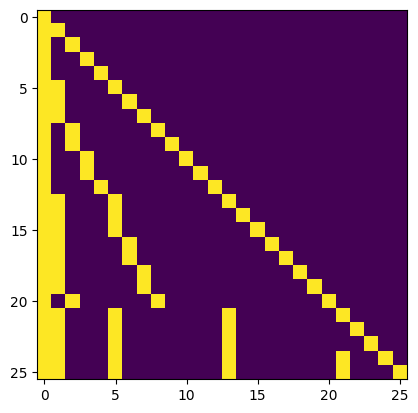

In [43]:
import matplotlib.pyplot as plt

from model.choices import *
from model.utils import *
eagle_choice = mc_sim_7b_63
eagle_buffer = generate_tree_buffers(eagle_choice, device='cpu')
eagle_attn_mask = eagle_buffer['tree_attn_mask']
print(eagle_attn_mask.shape)

plt.imshow(eagle_attn_mask[0,0].cpu().numpy())

In [44]:
eagle_buffer['tree_indices']

tensor([  0,   1,   2,   3,   4,  11,  12,  13,  21,  22,  31,  32,  41,  51,
         52,  53,  61,  62,  71,  72,  81,  91,  92,  93, 101, 102])

In [45]:
eagle_buffer['tree_position_ids']

tensor([0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
        5, 5])

In [46]:
eagle_buffer['tree_indices']

tensor([  0,   1,   2,   3,   4,  11,  12,  13,  21,  22,  31,  32,  41,  51,
         52,  53,  61,  62,  71,  72,  81,  91,  92,  93, 101, 102])

In [49]:
eagle_buffer['retrieve_indices']

tensor([[ 0,  1,  5, 13, 21, 25],
        [ 0,  1,  5, 13, 21, 24],
        [ 0,  1,  5, 13, 23, -1],
        [ 0,  1,  5, 13, 22, -1],
        [ 0,  2,  8, 20, -1, -1],
        [ 0,  1,  7, 19, -1, -1],
        [ 0,  1,  7, 18, -1, -1],
        [ 0,  1,  6, 17, -1, -1],
        [ 0,  1,  6, 16, -1, -1],
        [ 0,  1,  5, 15, -1, -1],
        [ 0,  1,  5, 14, -1, -1],
        [ 0,  4, 12, -1, -1, -1],
        [ 0,  3, 11, -1, -1, -1],
        [ 0,  3, 10, -1, -1, -1],
        [ 0,  2,  9, -1, -1, -1]])

torch.Size([1, 1, 6, 6])


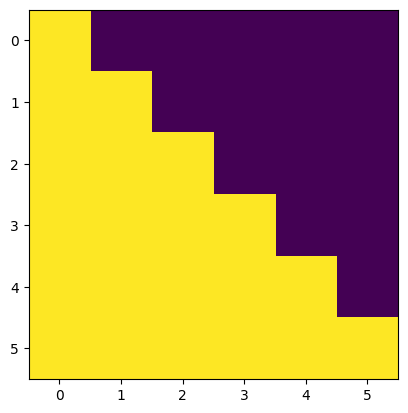

In [58]:
import matplotlib.pyplot as plt

from model.choices import *
from model.utils import *
eagle_choice = chain_5
eagle_buffer = generate_tree_buffers(eagle_choice, device='cpu')
eagle_attn_mask = eagle_buffer['tree_attn_mask']

print(eagle_attn_mask.shape)

plt.imshow(eagle_attn_mask[0,0].cpu().numpy())

In [59]:
eagle_buffer['tree_indices']

tensor([ 0,  1, 11, 21, 31, 41])

In [60]:
eagle_buffer

{'tree_attn_mask': tensor([[[[1., 0., 0., 0., 0., 0.],
           [1., 1., 0., 0., 0., 0.],
           [1., 1., 1., 0., 0., 0.],
           [1., 1., 1., 1., 0., 0.],
           [1., 1., 1., 1., 1., 0.],
           [1., 1., 1., 1., 1., 1.]]]]),
 'tree_indices': tensor([ 0,  1, 11, 21, 31, 41]),
 'tree_position_ids': tensor([0, 1, 2, 3, 4, 5]),
 'retrieve_indices': tensor([[0, 1, 2, 3, 4, 5]])}

In [3]:
from model.ea_model import EaModel
import torch
import time

base_model_path = "/ssd0/data/fast-llm/Llama-2-70B-Chat-fp16/"
EAGLE_model_path = "yuhuili/EAGLE-llama2-chat-70B"


model = EaModel.from_pretrained(  
    base_model_path=base_model_path,  
    ea_model_path=EAGLE_model_path,  
    torch_dtype=torch.float16,  
    low_cpu_mem_usage=True,  
    device_map="auto"  
)



/home/jewon/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 15/15 [01:06<00:00,  4.41s/it]
/root/anaconda3/envs/EAGLE/lib/python3.8/site-packages/transformers/generation/configuration_utils.py:362: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/root/anaconda3/envs/EAGLE/lib/python3.8/site-packages/transformers/generation/configuration_utils.py:367: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- thi

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

prompt="Hello Nice to meet you! give me a five story about human and AI"

base_model_path = "/ssd0/data/fast-llm/Llama-2-70B-Chat-fp16/"
tokenizer = AutoTokenizer.from_pretrained(base_model_path)
model = AutoModelForCausalLM.from_pretrained(base_model_path, 
                                             torch_dtype=torch.float16, 
                                             low_cpu_mem_usage=True, 
                                             device_map="auto")




/home/jewon/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 15/15 [00:48<00:00,  3.21s/it]
/root/anaconda3/envs/EAGLE/lib/python3.8/site-packages/transformers/generation/configuration_utils.py:362: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/root/anaconda3/envs/EAGLE/lib/python3.8/site-packages/transformers/generation/configuration_utils.py:367: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- thi

In [21]:
dummy_list = [prompt*10] * 3
dummy = tokenizer.batch_encode_plus(dummy_list, return_tensors="pt")
dummy.input_ids.shape, dummy.attention_mask.shape

(torch.Size([3, 161]), torch.Size([3, 161]))

In [22]:
single_dummy = prompt*10
single_dummy = tokenizer.encode_plus(single_dummy, return_tensors="pt")
single_dummy.keys()

dict_keys(['input_ids', 'attention_mask'])

In [23]:
import time
dummy.to("cuda")
single_dummy.to("cuda")

model.eval()

warmup = 10
tot = 0

for _ in range(warmup):
    model(input_ids=dummy.input_ids,
          attention_mask=dummy.attention_mask)

for i in range(20):
    tic = time.time()
    model(input_ids=dummy.input_ids,
          attention_mask=dummy.attention_mask)
    toc =time.time()
    tot += (toc-tic) 
    
for i in range(1):
    tic_single = time.time()
    model(input_ids=single_dummy.input_ids,)
    toc_single =time.time()
    
print(tot/20)
print(toc_single-tic_single)

0.38752853870391846
0.23229742050170898


In [1]:
import transformers
print(transformers.__version__)

/home/jewon/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


4.35.2


In [8]:
!pip install tokenizers

In [1]:
import os
def list_files(path):
    datapath = []
    for root, directories, files in os.walk(path):
        for file in files:
            file_path = os.path.join(root, file)
            datapath.append(file_path)
    return datapath

datapath=list_files("/ssd0/data/fast-llm/eagle_train_data")

In [2]:
from torch.utils.data import Dataset, DataLoader

train_config={
    "is_warmup":True,
    "num_epochs":10,
    "num_warmup_steps":4000,
    "total_steps":81490,
    "p_w":0.1,
    "v_w":1.0,
    "head_w":0.1,
    "num_workers":16,
    "embeding":True,
    "act":"No",
    "data_noise":True,
    "noise":"uniform",
    "mean":0.0,
    "std":0.2,
    "residual":"true,norm",
    "max_len":2048,
    "b1":0.9,
    "b2": 0.95,
    "grad_clip": 0.5,
}

class CustomDataset(Dataset):
    def __init__(self, datapath, transform=None):
        self.data=datapath
        self.transform = transform


    def __len__(self):
        return len(self.data)


    def __getitem__(self, index):
        # try:
        data=torch.load(self.data[index])
        new_data={}
        hidden_state=data['hidden_state'][:train_config["max_len"]][None,:]
        input_ids = data['input_ids'][:train_config["max_len"]][None,:]
        loss_mask = data["loss_mask"][:train_config["max_len"]][None,:]

        # except:
        #     with open("error_path.txt", "w") as file:
        #         file.write(self.data[index])
        #     print('error path',self.data[index])


        length=hidden_state.shape[1]
        #length_q = data['query_ids'].shape[1]
        attention_mask=[1]*length
        loss_mask=loss_mask[0].tolist()
        loss_mask[-1]=0

        input_ids_target=input_ids[:,1:]
        zeropadding = torch.tensor([[0]])
        input_ids_target = torch.cat((input_ids_target, zeropadding), dim=1)




        target=hidden_state[:,1:,:]
        zeropadding=torch.zeros(1, 1, target.shape[2])
        target=torch.cat((target,zeropadding), dim=1)
        loss_mask[-1]=0
        new_data["attention_mask"] = attention_mask
        new_data["loss_mask"] = loss_mask
        new_data["target"]=target
        new_data["hidden_state_big"]=hidden_state
        new_data["input_ids"] = input_ids_target
        #sample = torch.cat((data['xs'],data['xb']))
        # sample=torch.cat((self.data[index]['x'],self.data[index]['logits']))
        #label = data['y']

        if self.transform:
            new_data = self.transform(new_data)

        return new_data

In [3]:

from typing import Any, Dict, List, Optional, Union

class DataCollatorWithPadding:


    def paddingtensor(self,intensors,N):
        B,n,S=intensors.shape
        #padding_tensor = torch.zeros(B, N - n, S,dtype=intensors.dtype)
        padding_tensor = torch.zeros(B, N - n, S)
        outtensors = torch.cat((intensors, padding_tensor), dim=1)
        return outtensors

    def paddingtensor2D(self,intensors,N):
        B,n=intensors.shape
        padding_tensor = torch.zeros(B, N - n,dtype=intensors.dtype)
        outtensors = torch.cat((intensors, padding_tensor), dim=1)
        return outtensors


    def __call__(self, features: List[Dict[str, Any]]) -> Dict[str, Any]:
        max_length = max(item['hidden_state_big'].shape[1] for item in features)
        batch_input_ids = torch.cat([self.paddingtensor2D(item['input_ids'], max_length) for item in features])
        batch_hidden_states=torch.cat([self.paddingtensor(item['hidden_state_big'],max_length) for item in features])
        batch_target = torch.cat([self.paddingtensor(item['target'], max_length) for item in features])
        batch_loss_mask = torch.tensor([item['loss_mask'] + [0] * (max_length - len(item['loss_mask'])) for item in features])
        batch_attention_mask = torch.tensor([item['attention_mask'] + [0] * (max_length - len(item['attention_mask'])) for item in features])
        # batch_loss_mask = torch.ones_like(batch_loss_mask)
        # batch_attention_mask=torch.ones_like(batch_attention_mask)
        batch = {
            "input_ids":batch_input_ids,
            "hidden_states": batch_hidden_states,
            "target":batch_target,
            "attention_mask": batch_attention_mask,
            "loss_mask": batch_loss_mask,
        }
        return batch

In [5]:
traindataset=CustomDataset(datapath)
train_loader=DataLoader(traindataset, batch_size=3, shuffle=True,collate_fn=DataCollatorWithPadding(),num_workers=16,pin_memory=True)

In [6]:
len(train_loader)*0.95*5

108641.99999999999

In [15]:
len(train_loader)

4289

In [22]:
len(train_loader)*0.95 *20

186257.0

In [5]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("Upstage/SOLAR-10.7B-Instruct-v1.0")
# model = AutoModelForCausalLM.from_pretrained(
#     "Upstage/SOLAR-10.7B-Instruct-v1.0",
#     device_map="auto",
#     torch_dtype=torch.float16,
# )
conversation = [ {'role': 'user', 'content': 'Hello?'} ] 

prompt = tokenizer.apply_chat_template(conversation, tokenize=False, add_generation_prompt=True)

print(prompt)
inputs = tokenizer(prompt, return_tensors="pt")
# outputs = model.generate(**inputs, use_cache=True, max_length=4096)
# output_text = tokenizer.decode(outputs[0]) 
# print(output_text)
conversation = [ {'role': 'user', 'content': 'Hello?'} ] 
prompt = tokenizer.apply_chat_template(conversation, tokenize=False, add_generation_prompt=True)
input_ids = tokenizer([prompt]).input_ids
input_ids

### User:
Hello?

### Assistant:



[[1, 774, 1247, 28747, 13, 16230, 28804, 13, 13, 27332, 21631, 28747, 13]]

In [57]:
import torch

test = torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
test[1:]


tensor([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [7]:
import time
input_ids = tokenizer.encode(prompt, return_tensors="pt").cuda()

start = time.time()
output_ids = model.generate(input_ids,
                            max_new_tokens=512,
                            do_sample=True,
                            temperature=0.9,
                            top_p=0.9,
                            top_k=0,
                            use_cache=True,)
end = time.time()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [8]:
text = tokenizer.decode(output_ids[0])
print(text)

<s> Hello Nice to meet you! give me a five story about human and AI collaboration

Sure, here are five stories about human and AI collaboration:

1. The AI-Powered Doctor's Assistant:

In a small town, there was a doctor who was struggling to keep up with the demand for medical care. He was overworked and his patients were suffering as a result. One day, he met an AI developer who had created an AI-powered doctor's assistant. The AI was able to analyze medical data and provide accurate diagnoses and treatment recommendations. The doctor was skeptical at first, but he decided to give the AI a try.

The AI quickly proved to be a valuable asset, freeing up the doctor's time to focus on more complex cases. The AI was able to identify patterns and anomalies in patient data that the doctor had missed, and it even helped the doctor to identify a rare disease that he had never seen before. The patients were impressed with the AI's accuracy and the doctor's improved bedside manner. The collabor

In [9]:
print((end-start)/(len(output_ids[0])-len(input_ids[0])))

0.10810041194781661


In [3]:
model.eval()
prompt="Hello Nice to meet you! give me a five story about human and AI"
input_ids=model.tokenizer([prompt]).input_ids
input_ids = torch.as_tensor(input_ids).cuda()
start = time.time()

output_ids=model.eagenerate(input_ids,
                            temperature=0.9,
                            max_new_tokens=512)
end = time.time()

output=model.tokenizer.decode(output_ids[0])

print(((end-start)/(len(output_ids[0])- len(input_ids[0])))*1000)

NameError: name 'model' is not defined

In [28]:
start_base = time.time()
model.base_model.generate(input_ids,
                     temperature=0.5,
                     max_new_tokens=512)
end_base = time.time()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


IndexError: The shape of the mask [1, 1, 26, 26] at index 2 does not match the shape of the indexed tensor [1, 1, 17, 17] at index 2

In [29]:
len(output_ids[0])

444

In [30]:
len(input_ids[0])

17

In [1]:
print(((end-start)/(len(output_ids[0])- len(input_ids[0])))*1000)

NameError: name 'end' is not defined

In [6]:
import torch

In [7]:
a = torch.tensor([[1,2,3],[4,5,6]])

In [11]:
a = a.view(1,-1)

In [15]:
a[:, 1:]

tensor([[2, 3, 4, 5, 6]])

In [15]:
import torch

tmp = torch.randn(2,3,4)
another = torch.randint(0, 3, (1,2))

In [16]:
tmp.shape, another.shape

(torch.Size([2, 3, 4]), torch.Size([1, 2]))

tensor([[0, 0]])

In [19]:
tmp

tensor([[[-1.2285, -0.2771, -1.2256,  0.2589],
         [ 0.7169, -0.4452,  0.0709, -0.7919],
         [ 1.3631, -2.1339, -0.1270,  0.6295]],

        [[-0.2772,  1.5934,  0.0378,  0.5314],
         [ 0.5136, -1.2431, -1.5626,  0.5618],
         [ 0.3346, -0.6924, -1.3657,  2.2490]]])

In [18]:
tmp[0, another]

tensor([[[-1.2285, -0.2771, -1.2256,  0.2589],
         [-1.2285, -0.2771, -1.2256,  0.2589]]])

In [ ]:
from 